In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import os

## We have simulation results for 40 ysensors for each of the 196 positions approx. 5 cm apart from each other to cover the 2m y-length of the panel (real-world x). At first, we observe the 'with racking' scenario. 

In [2]:
data_with = pd.read_csv('COMPILED_Results_WITH_19AUG_complete.csv', index_col = 0)

In [4]:
data_with.shape

(196, 10)

In [6]:
data_with.columns

Index(['Timestamp', 'Position', 'x', 'y', 'z', 'rearZ', 'mattype', 'rearMat',
       'Wm2Front', 'Wm2Back'],
      dtype='object')

In [7]:
data_with.head(10)

,Timestamp,Position,x,y,z,rearZ,mattype,rearMat,Wm2Front,Wm2Back
0,21_04_29_11,0,"[0.8834997, 0.8386137, 0.7937277, 0.7488416, 0...","[0.489, 0.489, 0.489, 0.489, 0.489, 0.489, 0.4...","[0.9968884, 1.015988, 1.035087, 1.054186, 1.07...","[0.9766448, 0.995744, 1.014843, 1.033942, 1.05...",['a9.4.a0.Prism_Solar_Bi60_landscape_With.6457...,['a9.4.a0.Prism_Solar_Bi60_landscape_With.2310...,"[1021.668, 1021.68, 1021.6926666666668, 1021.7...","[6.669958666666666, 7.081967333333334, 15.2070..."
1,21_04_29_11,1,"[0.8834997, 0.8386137, 0.7937277, 0.7488416, 0...","[0.484, 0.484, 0.484, 0.484, 0.484, 0.484, 0.4...","[0.9968884, 1.015988, 1.035087, 1.054186, 1.07...","[0.9766448, 0.995744, 1.014843, 1.033942, 1.05...",['a9.4.a0.Prism_Solar_Bi60_landscape_With.6457...,['a9.4.a0.Prism_Solar_Bi60_landscape_With.2310...,"[1021.2833333333332, 1021.3283333333334, 1021....","[6.793943, 7.176831666666668, 16.5980566666666..."
2,21_04_29_11,2,"[0.8834997, 0.8386137, 0.7937277, 0.7488416, 0...","[0.479, 0.479, 0.479, 0.479, 0.479, 0.479, 0.4...","[0.9968884, 1.015988, 1.035087, 1.054186, 1.07...","[0.9766448, 0.995744, 1.014843, 1.033942, 1.05...",['a9.4.a0.Prism_Solar_Bi60_landscape_With.6457...,['a9.4.a0.Prism_Solar_Bi60_landscape_With.2310...,"[1021.0056666666666, 1021.027, 1021.0483333333...","[8.085083666666668, 8.428241666666667, 18.1836..."
3,21_04_29_11,3,"[0.8834997, 0.8386137, 0.7937277, 0.7488416, 0...","[0.474, 0.474, 0.474, 0.474, 0.474, 0.474, 0.4...","[0.9968884, 1.015988, 1.035087, 1.054186, 1.07...","[0.9766448, 0.995744, 1.014843, 1.033942, 1.05...",['a9.4.a0.Prism_Solar_Bi60_landscape_With.6457...,['a9.4.a0.Prism_Solar_Bi60_landscape_With.2310...,"[1021.645, 1021.664, 1021.6833333333334, 1021....","[10.233376666666668, 10.68296, 24.27887, 24.17..."
4,21_04_29_11,4,"[0.8834997, 0.8386137, 0.7937277, 0.7488416, 0...","[0.469, 0.469, 0.469, 0.469, 0.469, 0.469, 0.4...","[0.9968884, 1.015988, 1.035087, 1.054186, 1.07...","[0.9766448, 0.995744, 1.014843, 1.033942, 1.05...",['a9.4.a0.Prism_Solar_Bi60_landscape_With.6457...,['a9.4.a0.Prism_Solar_Bi60_landscape_With.2310...,"[1021.5733333333334, 1021.6363333333334, 1021....","[13.848623333333334, 14.458423333333334, 31.75..."
5,21_04_29_11,5,"[0.8834997, 0.8386137, 0.7937277, 0.7488416, 0...","[0.464, 0.464, 0.464, 0.464, 0.464, 0.464, 0.4...","[0.9968884, 1.015988, 1.035087, 1.054186, 1.07...","[0.9766448, 0.995744, 1.014843, 1.033942, 1.05...",['a9.4.a0.Prism_Solar_Bi60_landscape_With.6457...,['a9.4.a0.Prism_Solar_Bi60_landscape_With.2310...,"[1021.7766666666666, 1021.81, 1021.843, 1021.8...","[17.49372, 18.362526666666668, 41.456980000000..."
6,21_04_29_11,6,"[0.8834997, 0.8386137, 0.7937277, 0.7488416, 0...","[0.459, 0.459, 0.459, 0.459, 0.459, 0.459, 0.4...","[0.9968884, 1.015988, 1.035087, 1.054186, 1.07...","[0.9766448, 0.995744, 1.014843, 1.033942, 1.05...",['a9.4.a0.Prism_Solar_Bi60_landscape_With.6457...,['a9.4.a0.Prism_Solar_Bi60_landscape_With.2310...,"[1021.3913333333334, 1021.4316666666668, 1021....","[22.371443333333332, 23.58848, 52.003873333333..."
7,21_04_29_11,7,"[0.8834997, 0.8386137, 0.7937277, 0.7488416, 0...","[0.454, 0.454, 0.454, 0.454, 0.454, 0.454, 0.4...","[0.9968884, 1.015988, 1.035087, 1.054186, 1.07...","[0.9766448, 0.995744, 1.014843, 1.033942, 1.05...",['a9.4.a0.Prism_Solar_Bi60_landscape_With.6457...,['a9.4.a0.Prism_Solar_Bi60_landscape_With.2310...,"[1021.7436666666666, 1021.76, 1021.77633333333...","[27.80619, 29.36632, 62.34729, 62.041043333333..."
8,21_04_29_11,8,"[0.8834997, 0.8386137, 0.7937277, 0.7488416, 0...","[0.449, 0.449, 0.449, 0.449, 0.449, 0.449, 0.4...","[0.9968884, 1.015988, 1.035087, 1.054186, 1.07...","[0.9766448, 0.995744, 1.014843, 1.033942, 1.05...",['a9.4.a0.Prism_Solar_Bi60_landscape_With.6457...,['a9.4.a0.Prism_Solar_Bi60_landscape_With.2310...,"[1021.1206666666668, 1021.1473333333332, 1021....","[31.721906666666666, 33.59222666666667, 69.120..."
9,21_04_29_11,9,"[0.8834997, 0.8386137, 0.7937277, 0.7488416, 0...","[0.444, 0.444,

The strings are to split as appropriate datatype

In [8]:
Wm2Front_with = data_with["Wm2Front"].str.strip('[]').str.split(',', expand=True).astype(float)
Wm2Back_with = data_with["Wm2Back"].str.strip('[]').str.split(',', expand=True).astype(float)

In [9]:
# Just a function to flip the columns (required for x and associated readings to be put as from east to west)
def df_correct(df):
    return df[df.columns[::-1]]

In [19]:
Wm2Front_with_w2e = df_correct(Wm2Front_with)
Wm2Back_with_w2e = df_correct(Wm2Back_with)

In [11]:
x = data_with["x"].str.strip('[]').str.split(',', expand=True).astype(float)
y = data_with["y"].str.strip('[]').str.split(',', expand=True).astype(float)

In [15]:
print(x.shape)
x.head()

(196, 40)


,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.8835,0.838614,0.793728,0.748842,0.703956,0.65907,0.614184,0.569298,0.524412,0.479525,...,-0.463081,-0.507967,-0.552853,-0.597739,-0.642625,-0.687511,-0.732397,-0.777283,-0.822169,-0.867055
1,0.8835,0.838614,0.793728,0.748842,0.703956,0.65907,0.614184,0.569298,0.524412,0.479525,...,-0.463081,-0.507967,-0.552853,-0.597739,-0.642625,-0.687511,-0.732397,-0.777283,-0.822169,-0.867055
2,0.8835,0.838614,0.793728,0.748842,0.703956,0.65907,0.614184,0.569298,0.524412,0.479525,...,-0.463081,-0.507967,-0.552853,-0.597739,-0.642625,-0.687511,-0.732397,-0.777283,-0.822169,-0.867055
3,0.8835,0.838614,0.793728,0.748842,0.703956,0.65907,0.614184,0.569298,0.524412,0.479525,...,-0.463081,-0.507967,-0.552853,-0.597739,-0.642625,-0.687511,-0.732397,-0.777283,-0.822169,-0.867055
4,0.8835,0.838614,0.793728,0.748842,0.703956,0.65907,0.614184,0.569298,0.524412,0.479525,...,-0.463081,-0.507967,-0.552853,-0.597739,-0.642625,-0.687511,-0.732397,-0.777283,-0.822169,-0.867055


It is observed that the x positions move from east to west before flipping.

In [16]:
y.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.489,0.489,0.489,0.489,0.489,0.489,0.489,0.489,0.489,0.489,...,0.489,0.489,0.489,0.489,0.489,0.489,0.489,0.489,0.489,0.489
1,0.484,0.484,0.484,0.484,0.484,0.484,0.484,0.484,0.484,0.484,...,0.484,0.484,0.484,0.484,0.484,0.484,0.484,0.484,0.484,0.484
2,0.479,0.479,0.479,0.479,0.479,0.479,0.479,0.479,0.479,0.479,...,0.479,0.479,0.479,0.479,0.479,0.479,0.479,0.479,0.479,0.479
3,0.474,0.474,0.474,0.474,0.474,0.474,0.474,0.474,0.474,0.474,...,0.474,0.474,0.474,0.474,0.474,0.474,0.474,0.474,0.474,0.474
4,0.469,0.469,0.469,0.469,0.469,0.469,0.469,0.469,0.469,0.469,...,0.469,0.469,0.469,0.469,0.469,0.469,0.469,0.469,0.469,0.469


In [17]:
y.tail()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
191,-0.466,-0.466,-0.466,-0.466,-0.466,-0.466,-0.466,-0.466,-0.466,-0.466,...,-0.466,-0.466,-0.466,-0.466,-0.466,-0.466,-0.466,-0.466,-0.466,-0.466
192,-0.471,-0.471,-0.471,-0.471,-0.471,-0.471,-0.471,-0.471,-0.471,-0.471,...,-0.471,-0.471,-0.471,-0.471,-0.471,-0.471,-0.471,-0.471,-0.471,-0.471
193,-0.476,-0.476,-0.476,-0.476,-0.476,-0.476,-0.476,-0.476,-0.476,-0.476,...,-0.476,-0.476,-0.476,-0.476,-0.476,-0.476,-0.476,-0.476,-0.476,-0.476
194,-0.481,-0.481,-0.481,-0.481,-0.481,-0.481,-0.481,-0.481,-0.481,-0.481,...,-0.481,-0.481,-0.481,-0.481,-0.481,-0.481,-0.481,-0.481,-0.481,-0.481
195,-0.486,-0.486,-0.486,-0.486,-0.486,-0.486,-0.486,-0.486,-0.486,-0.486,...,-0.486,-0.486,-0.486,-0.486,-0.486,-0.486,-0.486,-0.486,-0.486,-0.486


It is observed that the y readings are identical for the same position as expected. The positions move from north to south before flipping.

In [22]:
x_w2e = df_correct(x)

In [20]:
data_backirr_with = Wm2Back_with_w2e

In [23]:
y_vals = y.iloc[:,0]

In [24]:
y_vals

0      0.489
1      0.484
2      0.479
3      0.474
4      0.469
       ...  
191   -0.466
192   -0.471
193   -0.476
194   -0.481
195   -0.486
Name: 0, Length: 196, dtype: float64

In [25]:
data_backirr_with.set_index(y_vals)

,39,38,37,36,35,34,33,32,31,30,...,9,8,7,6,5,4,3,2,1,0
0,,,,,,,,,,,,,,,,,,,,,
0.489,10.998400,10.411933,13.085927,12.731760,12.985853,13.168113,12.527310,12.545530,10.287140,9.719674,...,15.744070,16.532390,14.618677,15.078793,13.737433,14.594883,15.610983,15.207037,7.081967,6.669959
0.484,11.458197,11.463033,13.464470,13.357547,15.200250,14.871917,11.342740,11.314413,10.696580,10.550347,...,16.137163,16.813347,16.974747,17.314697,16.861407,17.587877,16.313440,16.598057,7.176832,6.793943
0.479,14.273977,14.176517,15.123027,15.203517,14.712120,14.718250,15.004007,14.964133,13.143150,13.083877,...,19.098563,19.249270,19.385087,19.491197,19.126247,19.116607,18.100627,18.183633,8.428242,8.085084
0.474,19.156520,19.197317,19.938380,19.812283,19.072517,18.858870,17.521850,17.373983,18.294570,18.198643,...,21.935543,22.109823,22.976903,23.205650,23.450163,23.574133,24.170597,24.278870,10.682960,10.233377
0.469,23.881840,23.850977,25.661307,25.613033,24.786590,24.770353,24.312810,24.224987,22.523490,22.337313,...,28.302040,28.331783,29.462107,29.607257,31.344343,31.471263,31.666693,31.755713,14.458423,13.848623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-0.466,28.982667,28.936907,29.522123,29.583850,27.967783,27.926237,27.794937,27.696733,26.276197,26.291937,...,32.521600,32.498493,34.336447,34.415730,36.147173,36.214813,37.159587,37.239897,16.946683,16.167060
-0.471,21.395490,21.313043,22.548983,22.534853,22.809480,22.696317,20.498093,20.416270,19.906127,19.843697,...,25.109677,25.296957,26.085107,26.114663,27.515143,27.466553,27.662763,27.663563,13.120063,12.613153
-0.476,16.435960,16.470197,18.332917,18.191670,17.743237,17.588120,17.518107,17.336143,15.570153,15.510603,...,20.289937,20.520537,21.713833,21.902807,23.017703,23.063117,22.402757,22.480173,9.902748,9.545854


In [27]:
data_backirr_with.columns = x_w2e.iloc[0,:]

In [31]:
data_backirr_with.set_index(y_vals, inplace = True)

In [32]:
data_backirr_with.head()

,-0.867055,-0.822169,-0.777283,-0.732397,-0.687511,-0.642625,-0.597739,-0.552853,-0.507967,-0.463081,...,0.479525,0.524412,0.569298,0.614184,0.659070,0.703956,0.748842,0.793728,0.838614,0.883500
0,,,,,,,,,,,,,,,,,,,,,
0.489,10.998400,10.411933,13.085927,12.731760,12.985853,13.168113,12.527310,12.545530,10.28714,9.719674,...,15.744070,16.532390,14.618677,15.078793,13.737433,14.594883,15.610983,15.207037,7.081967,6.669959
0.484,11.458197,11.463033,13.464470,13.357547,15.200250,14.871917,11.342740,11.314413,10.69658,10.550347,...,16.137163,16.813347,16.974747,17.314697,16.861407,17.587877,16.313440,16.598057,7.176832,6.793943
0.479,14.273977,14.176517,15.123027,15.203517,14.712120,14.718250,15.004007,14.964133,13.14315,13.083877,...,19.098563,19.249270,19.385087,19.491197,19.126247,19.116607,18.100627,18.183633,8.428242,8.085084
0.474,19.156520,19.197317,19.938380,19.812283,19.072517,18.858870,17.521850,17.373983,18.29457,18.198643,...,21.935543,22.109823,22.976903,23.205650,23.450163,23.574133,24.170597,24.278870,10.682960,10.233377
0.469,23.881840,23.850977,25.661307,25.613033,24.786590,24.770353,24.312810,24.224987,22.52349,22.337313,...,28.302040,28.331783,29.462107,29.607257,31.344343,31.471263,31.666693,31.755713,14.458423,13.848623


In [ ]:
plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.figsize'] = (12, 8)

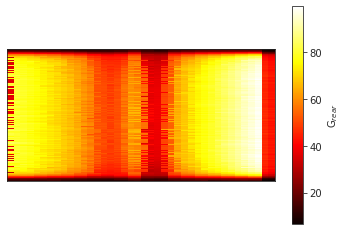

In [33]:
with sns.axes_style("white"):
    fig = plt.imshow(data_backirr_with, cmap='hot', vmin=np.min(data_backirr_with).min(), vmax=np.max(data_backirr_with).max(), interpolation='none', aspect = 0.1)
    plt.colorbar(label='G$_{rear}$')
    #plt.title('Yearly Bifacial, in matrix form')
    fig.axes.get_yaxis().set_visible(False)
    fig.axes.get_xaxis().set_visible(False)

Time to analyze the 'without' scenario

In [34]:
data_without = pd.read_csv('COMPILED_Results_WITHOUT_19AUG_complete.csv', index_col = 0)

In [35]:
data_without.shape

(196, 10)

In [36]:
data_without.head()

,Timestamp,Position,x,y,z,rearZ,mattype,rearMat,Wm2Front,Wm2Back
0,21_04_29_11,0,"[0.8834997, 0.8386137, 0.7937277, 0.7488416, 0...","[0.489, 0.489, 0.489, 0.489, 0.489, 0.489, 0.4...","[0.9968884, 1.015988, 1.035087, 1.054186, 1.07...","[0.9766448, 0.995744, 1.014843, 1.033942, 1.05...","['a9.4.a0.FirstSolar_Imaginary_Without.6457', ...","['a9.4.a0.FirstSolar_Imaginary_Without.2310', ...","[1021.522, 1021.528, 1021.534, 1021.54, 1021.5...","[107.8391, 104.592, 101.3418, 98.09147, 94.262..."
1,21_04_29_11,1,"[0.8834997, 0.8386137, 0.7937277, 0.7488416, 0...","[0.484, 0.484, 0.484, 0.484, 0.484, 0.484, 0.4...","[0.9968884, 1.015988, 1.035087, 1.054186, 1.07...","[0.9766448, 0.995744, 1.014843, 1.033942, 1.05...","['a9.4.a0.FirstSolar_Imaginary_Without.6457', ...","['a9.4.a0.FirstSolar_Imaginary_Without.2310', ...","[1020.792, 1020.813, 1020.834, 1020.856, 1020....","[108.2267, 104.9346, 101.6401, 98.34559, 93.99..."
2,21_04_29_11,2,"[0.8834997, 0.8386137, 0.7937277, 0.7488416, 0...","[0.479, 0.479, 0.479, 0.479, 0.479, 0.479, 0.4...","[0.9968884, 1.015988, 1.035087, 1.054186, 1.07...","[0.9766448, 0.995744, 1.014843, 1.033942, 1.05...","['a9.4.a0.FirstSolar_Imaginary_Without.6457', ...","['a9.4.a0.FirstSolar_Imaginary_Without.2310', ...","[1020.435, 1020.464, 1020.4919999999998, 1020....","[108.36809999999998, 105.1361, 101.9015, 98.66..."
3,21_04_29_11,3,"[0.8834997, 0.8386137, 0.7937277, 0.7488416, 0...","[0.474, 0.474, 0.474, 0.474, 0.474, 0.474, 0.4...","[0.9968884, 1.015988, 1.035087, 1.054186, 1.07...","[0.9766448, 0.995744, 1.014843, 1.033942, 1.05...","['a9.4.a0.FirstSolar_Imaginary_Without.6457', ...","['a9.4.a0.FirstSolar_Imaginary_Without.2310', ...","[1020.574, 1020.641, 1020.708, 1020.776, 1020....","[107.9334, 104.7342, 101.5321, 98.32996, 93.60..."
4,21_04_29_11,4,"[0.8834997, 0.8386137, 0.7937277, 0.7488416, 0...","[0.469, 0.469, 0.469, 0.469, 0.469, 0.469, 0.4...","[0.9968884, 1.015988, 1.035087, 1.054186, 1.07...","[0.9766448, 0.995744, 1.014843, 1.033942, 1.05...","['a9.4.a0.FirstSolar_Imaginary_Without.6457', ...","['a9.4.a0.FirstSolar_Imaginary_Without.2310', ...","[1021.087, 1021.138, 1021.189, 1021.241, 1021....","[108.327, 105.1868, 102.0437, 98.90064, 95.010..."


The strings are to split as appropriate datatype

In [37]:
Wm2Front_without = data_without["Wm2Front"].str.strip('[]').str.split(',', expand=True).astype(float)
Wm2Back_without = data_without["Wm2Back"].str.strip('[]').str.split(',', expand=True).astype(float)

In [39]:
Wm2Front_without_w2e = df_correct(Wm2Front_without)
Wm2Back_without_w2e = df_correct(Wm2Back_without)

In [43]:
data_backirr_without = data_backirr_with

In [44]:
data_backirr_without.iloc[:,:] = Wm2Back_without_w2e

In [45]:
data_backirr_without.head()

,-0.867055,-0.822169,-0.777283,-0.732397,-0.687511,-0.642625,-0.597739,-0.552853,-0.507967,-0.463081,...,0.479525,0.524412,0.569298,0.614184,0.659070,0.703956,0.748842,0.793728,0.838614,0.883500
0,,,,,,,,,,,,,,,,,,,,,
0.489,84.21922,82.86361,81.50799,80.15237,78.79703,74.88685,73.53722,72.18758,70.83794,69.48949,...,80.46931,82.67374,85.64372,88.51749,91.39124,94.26231,98.09147,101.3418,104.5920,107.8391
0.484,81.66481,80.27742,78.89002,77.50328,77.20301,75.97069,74.73837,73.50575,70.48283,68.92654,...,80.34353,82.69274,85.53048,88.35162,91.17275,93.99107,98.34559,101.6401,104.9346,108.2267
0.479,85.22580,83.81531,82.40559,78.30156,77.03244,75.76332,74.49420,73.22508,71.95720,67.02434,...,79.98301,81.85786,86.26063,89.01737,91.77412,94.52807,98.66686,101.9015,105.1361,108.3681
0.474,85.18069,83.70794,82.23518,80.76327,76.51774,75.15943,73.80112,72.44282,71.08551,67.34213,...,80.03207,82.20074,85.19743,88.00173,90.80603,93.60809,98.32996,101.5321,104.7342,107.9334
0.469,84.14781,82.27888,80.92705,79.57520,78.22337,76.87283,72.90407,71.72337,70.54269,69.36295,...,79.83572,81.86417,86.87715,89.58916,92.30115,95.01048,98.90064,102.0437,105.1868,108.3270


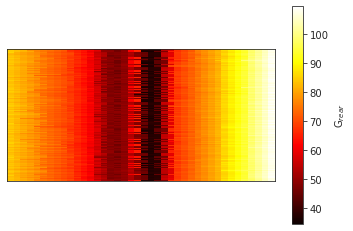

In [46]:
with sns.axes_style("white"):
    fig = plt.imshow(data_backirr_without, cmap='hot', vmin=np.min(data_backirr_without).min(), 
                     vmax=np.max(data_backirr_without).max(), interpolation='none', aspect = 0.1)
    plt.colorbar(label='G$_{rear}$')
    #plt.title('Yearly Bifacial, in matrix form')
    fig.axes.get_yaxis().set_visible(False)
    fig.axes.get_xaxis().set_visible(False)

This is just the preliminary analysis for a morning hour (11am) of a clear-sky day (29th April, 2021). Way to go!!!